### Clean the Test Data & input to model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_test = pd.read_csv('../data/test.csv',index_col=0)

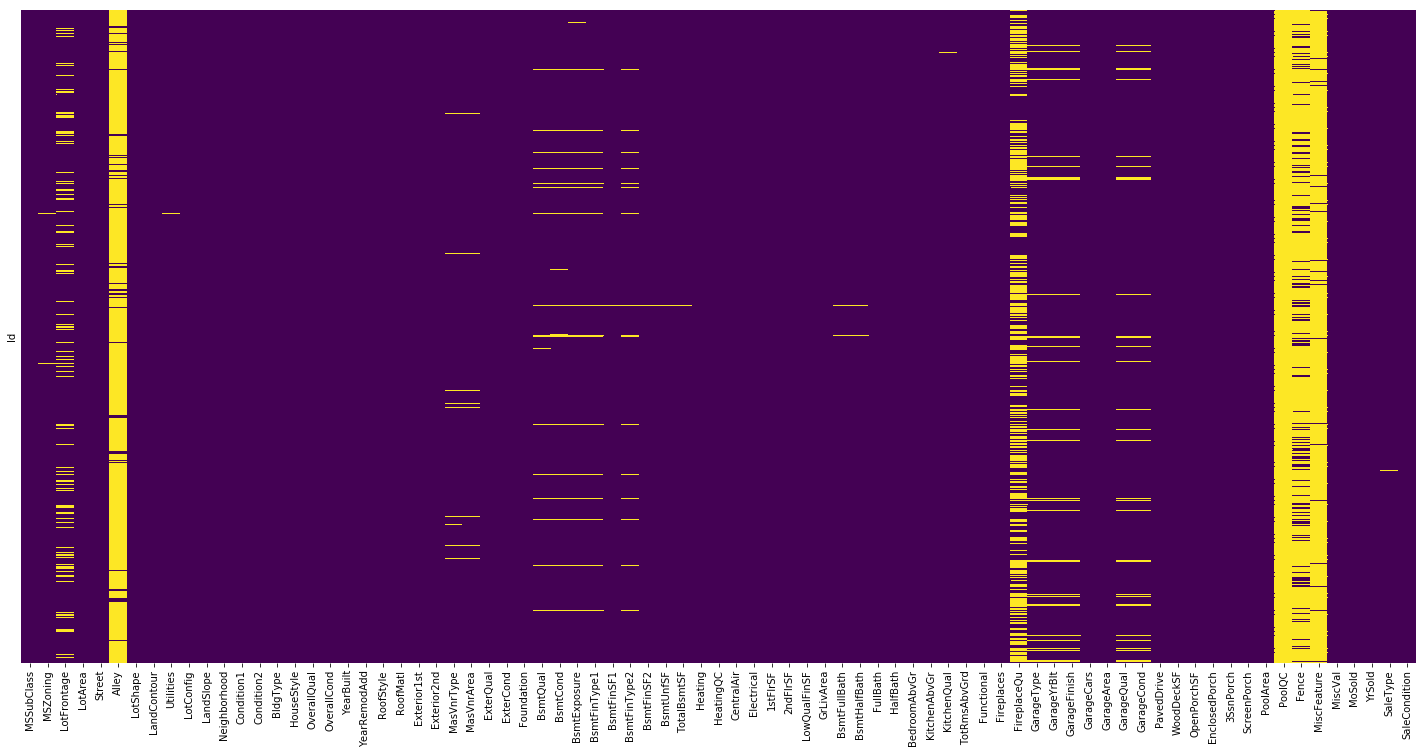

In [3]:
f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [4]:
def impute_alley(cols):
    Alley = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Alley):
        
        if Overallqual < 6:
            return "Grvl"
        else:
            return "Pave"
    else:
        return Alley

In [6]:
df_test['Alley'] = df_test[['Alley','OverallQual']].apply(impute_alley,axis =1)

In [7]:
def impute_bsmtcond(cols):
    Bsmtcond = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Bsmtcond):
        
        if Overallqual < 4:
            return "Po"
        elif Overallqual > 6:
            return "Gd"
        elif Overallqual == 6:
            return "TA"
        else:
            return "Fa"
    else:
        return Bsmtcond

In [8]:
df_test['Bsmtcond'] = df_test[['BsmtCond','OverallQual']].apply(impute_bsmtcond,axis =1)

In [9]:
def impute_bsmtqual(cols):
    Bsmtqual = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Bsmtqual):
        
        if Overallqual < 6:
            return "Fa"
        elif Overallqual == 6:
            return "TA"
        elif Overallqual == 7:
            return "Gd"
        else:
            return "Ex"
    else:
        return Bsmtqual

In [10]:
df_test['BsmtQual'] = df_test[['BsmtQual','OverallQual']].apply(impute_bsmtqual,axis =1)

In [11]:
def impute_garageyrblt(cols):
    Garageyrblt = cols[0]
    Yearbuilt = cols[1]
    
    if pd.isnull(Garageyrblt):
        return Yearbuilt       

    else:
        return Garageyrblt

In [13]:
df_test['GarageYrBlt'] = df_test[['GarageYrBlt','YearBuilt']].apply(impute_garageyrblt,axis =1)

In [14]:
def impute_fireplacequ(cols):
    Fireplacequ = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Fireplacequ):
        
        if Overallqual > 8:
            return "Ex"
        elif Overallqual == 8:
            return "Gd"
        elif Overallqual == 7:
            return "TA"
        elif Overallqual == 6:
            return "Fa"
        else:
            return "Po"
    else:
        return Fireplacequ

In [15]:
df_test['FireplaceQu'] = df_test[['FireplaceQu','OverallQual']].apply(impute_fireplacequ,axis =1)

In [16]:
def impute_masvnrtype(cols):
    Masvnrtype = cols[0]
    Yearbuilt = cols[1]
    
    if pd.isnull(Masvnrtype):
        
        if Yearbuilt > 2000:
            return 'Stone'
        elif Yearbuilt < 1965:
            return 'BrkCmn'
        elif Yearbuilt <=2000 and Yearbuilt >= 1965:
            return 'BrkFace'

    else:
        return Masvnrtype

In [19]:
df_test['MasVnrType'] = df_test[['MasVnrType','YearBuilt']].apply(impute_masvnrtype,axis =1)

In [20]:
def impute_garagequal(cols):
    Garagequal = cols[0]
    Garageyrblt = cols[1]
    
    if pd.isnull(Garagequal):
        
        if Garageyrblt >= 1990:
            return "Ex"
        elif Garageyrblt <= 1920:
            return "Po"
        elif Garageyrblt <= 1960 and Garageyrblt > 1920:
            return "Fa"
        elif Garageyrblt > 1980 and Garageyrblt < 1990:
            return "Gd"
        else:
            return "Fa"
    else:
        return Garagequal

In [21]:
df_test['GarageQual'] = df_test[['GarageQual','GarageYrBlt']].apply(impute_garagequal,axis =1)

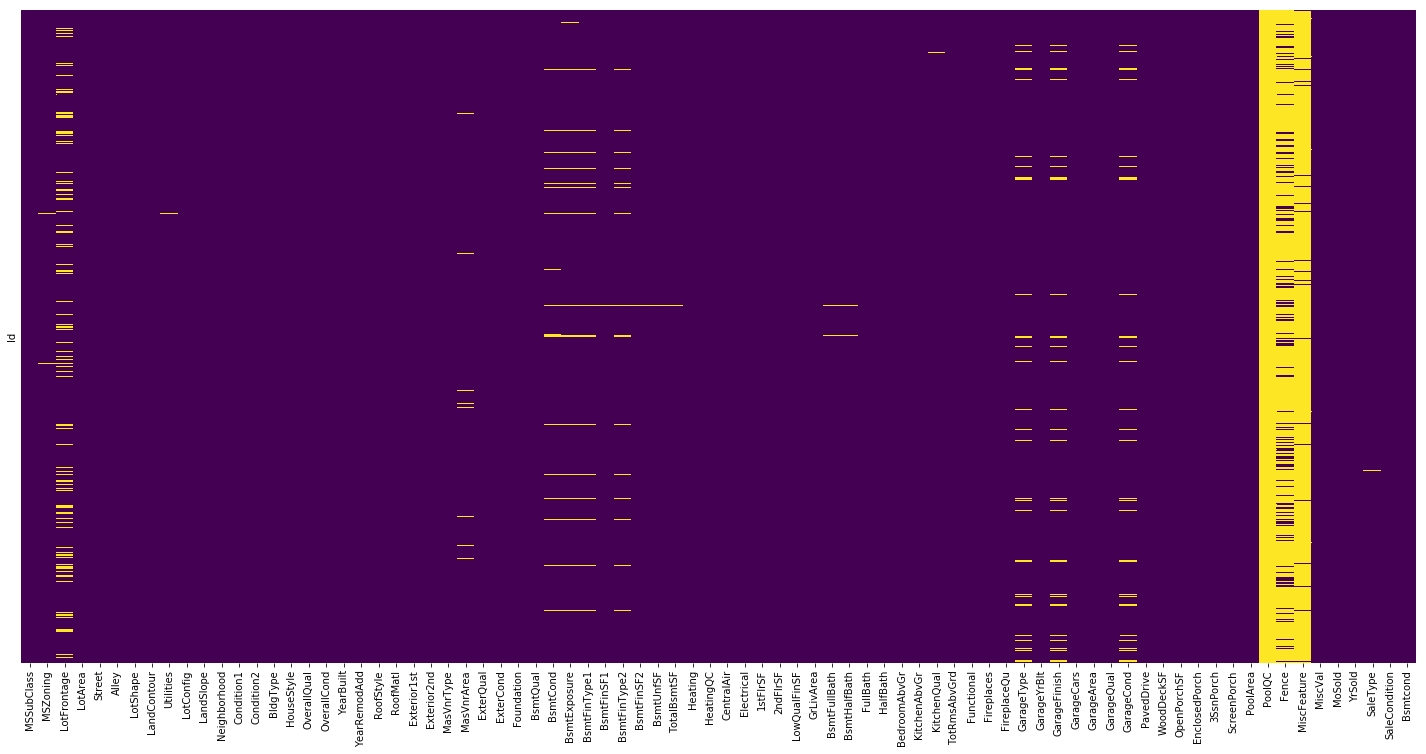

In [22]:
f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [23]:
cat_df = df_test.select_dtypes(include=['object'])

In [24]:
num_df = df_test.select_dtypes(exclude=['object'])

In [25]:
numerical_columns_with_null_rows = []
for col in num_df.columns:
    null_mask = num_df[col].isnull()
    null_row_count = num_df[null_mask].shape[0]
    if null_row_count > 0:
        numerical_columns_with_null_rows.append(col)
numerical_columns_with_null_rows

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [26]:
categorical_columns_with_null_rows = []
for col in cat_df.columns:
    null_mask = cat_df[col].isnull()
    null_row_count = cat_df[null_mask].shape[0]
    if null_row_count > 0:
        categorical_columns_with_null_rows.append(col)
categorical_columns_with_null_rows

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [29]:
cat_df.drop(['MiscFeature','PoolQC'], axis=1,inplace=True)

C:\Users\asrath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
for col in cat_df.columns:
    cat_df[col].fillna(cat_df[col].mode().values[0], inplace=True)

C:\Users\asrath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
cat_df.dtypes.value_counts()

object    42
dtype: int64

In [33]:
for col in numerical_columns_with_null_rows:
    num_df[col] = num_df[col].fillna(num_df[col].mean())

C:\Users\asrath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
kaggle_df = pd.merge(num_df,cat_df, left_index=True, right_index=True)

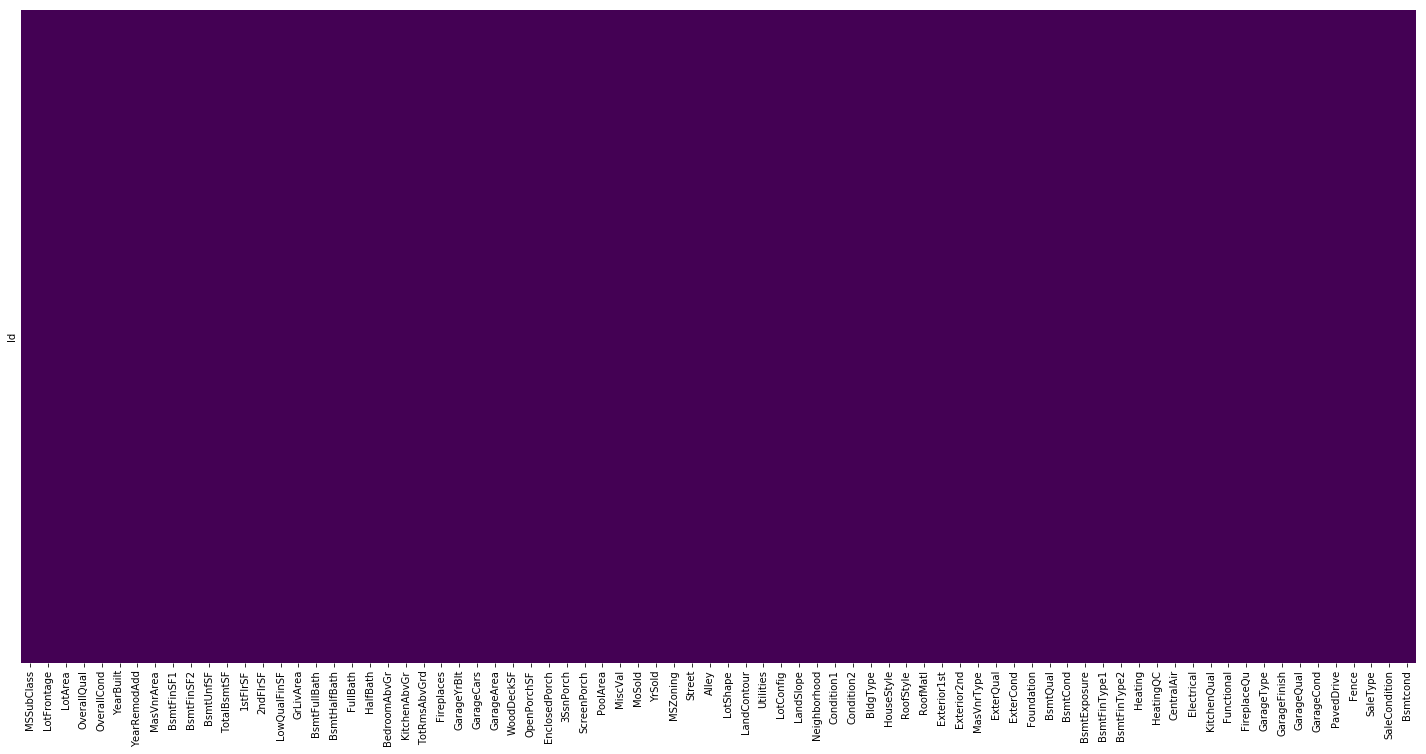

In [35]:
f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(kaggle_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Handelled all missing value, No missing value left

In [36]:
kaggle_df.to_csv('../data/kaggle.csv')

In [37]:
cat_df = kaggle_df.select_dtypes(include=['object'])

In [38]:
num_df = kaggle_df.select_dtypes(exclude=['object'])

In [39]:
columns_to_encode = cat_df.columns.values

In [40]:
columns_to_scale  = num_df.columns.values